In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

# for dataset generation
import torchvision
import torchvision.transforms as transforms

# visualization
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset

In [22]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 36569268.66it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1090929.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9199942.79it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3952391.86it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Visualization of the dataset

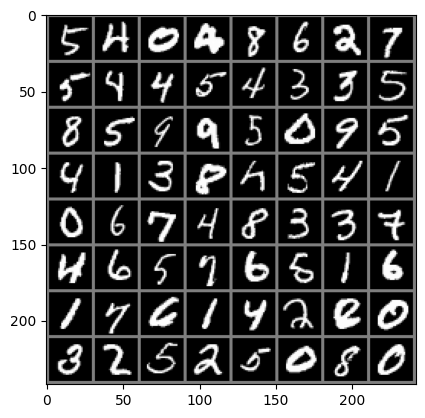

    5     4     0     4     8     6     2     7


In [25]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % labels[j].item() for j in range(8)))

# Define the Single-Layer Perceptron model

In [26]:
class SLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SLP, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.fc(x)
        return out

# Hyperparameters

In [27]:
input_dim = 28 * 28  # MNIST images are 28x28 pixels
output_dim = 10  # 10 classes for digits 0-9
learning_rate = 0.01
num_epochs = 10

# Initialize the model, loss function, and optimizer

In [28]:
model = SLP(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop

In [34]:
losses = []
accuracies = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.view(-1, 28*28)  # Flatten the images

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct / total
    losses.append(avg_loss)
    accuracies.append(accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch [1/10], Loss: 0.2952, Accuracy: 0.9170
Epoch [2/10], Loss: 0.2922, Accuracy: 0.9174
Epoch [3/10], Loss: 0.2904, Accuracy: 0.9189
Epoch [4/10], Loss: 0.2882, Accuracy: 0.9187
Epoch [5/10], Loss: 0.2866, Accuracy: 0.9196
Epoch [6/10], Loss: 0.2849, Accuracy: 0.9203
Epoch [7/10], Loss: 0.2833, Accuracy: 0.9204
Epoch [8/10], Loss: 0.2821, Accuracy: 0.9208
Epoch [9/10], Loss: 0.2806, Accuracy: 0.9213
Epoch [10/10], Loss: 0.2798, Accuracy: 0.9210


# Visualization of training loss and accuracy

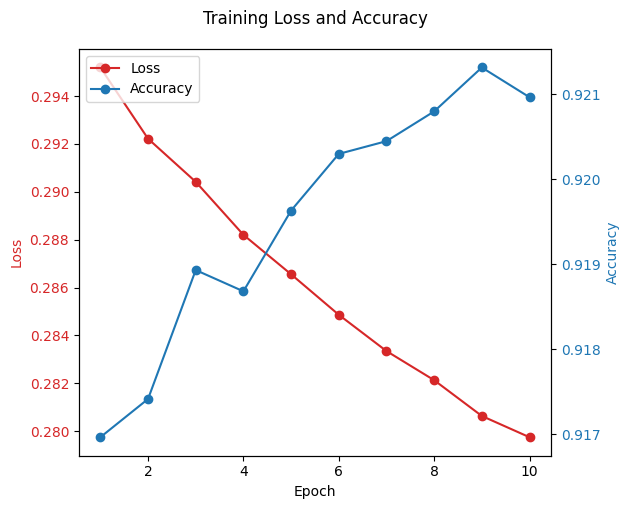

In [46]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, num_epochs + 1), losses, marker='o', color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1, num_epochs + 1), accuracies, marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('Training Loss and Accuracy', y=1.05)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# Evaluation

In [30]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_accuracy = correct / total

print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9202



# Visualization of Evaluation

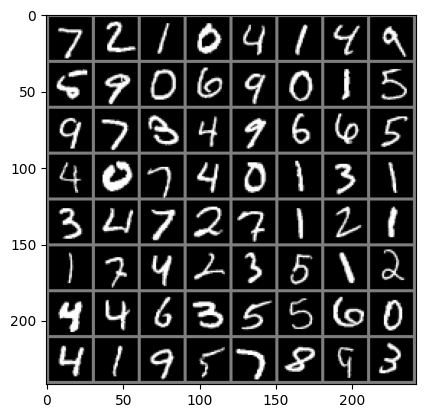

GroundTruth:      7     2     1     0     4     1     4     9
Predicted:      7     2     1     0     4     1     4     9


In [33]:
# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(8)))

# Print predicted labels
images = images.view(-1, 28*28)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(8)))